In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
df = pd.read_csv('data/SECURE_KEY/largecohort_HUP_subsetOfPriors_July2017.csv')

df.head(2)

,Race,Class,MatchedGroup,DummyID,AgeAtScreening,Race_Ethnicity,BMI,Laterality,LIBRA_PD_avg,LIBRA_DA_avg,Quantra_DV,Quantra_VBD,Quantra_APD
0,1,0,1,3010541,70.0,African American,28.30,NaN,17.782503,21.495786,133,10.6,9.8
1,1,0,1,3932266,70.0,African American,39.46,NaN,9.647734,23.960144,214,6.1,1.1


In [3]:
df['Race_Ethnicity'].value_counts()

African American    305
White               270
Name: Race_Ethnicity, dtype: int64

count    575.000000
mean      57.125739
std       11.538102
min       29.600000
25%       46.600000
50%       59.200000
75%       65.000000
max       87.400000
Name: AgeAtScreening, dtype: float64

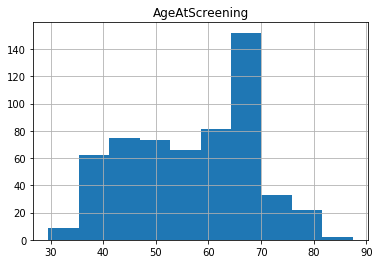

In [4]:
df.hist('AgeAtScreening')
df['AgeAtScreening'].describe()

count    566.000000
mean      29.566908
std        7.464809
min       16.900000
25%       23.725000
50%       28.300000
75%       34.580000
max       60.100000
Name: BMI, dtype: float64

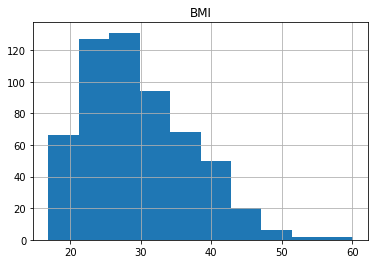

In [5]:
df[df['BMI'] > 0].hist('BMI')
df['BMI'][df['BMI'] > 0].describe()

In [6]:
stats_df = pd.read_table('data/summary_stats.tsv')

merged_df = (
    stats_df
    .merge(df, left_on='patient_id', right_on='DummyID')
    .drop(columns='DummyID')
)

merged_df.head(2)

,patient_id,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_clusterProminence,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_clusterShade,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_correlation,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_energy,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_entropy,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_haralickCorrelation,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_inertia,mean_cooccurrence_win_97_sliding_97_numbin_128_offset_17_inverseDifferenceMoment,mean_edgeenhance_win_97_sliding_97_Eta_10_epsi_10_radius_edge_8_radius_8_edge_enhance,...,MatchedGroup,AgeAtScreening,Race_Ethnicity,BMI,Laterality,LIBRA_PD_avg,LIBRA_DA_avg,Quantra_DV,Quantra_VBD,Quantra_APD
0,4293341,231854.0,87.69597,0.008272,0.002229,9.120195,2667929.0,58.51369,0.158891,3.241370e-07,...,198,60.0,African American,32.7,NaN,8.888325,19.65808,320,8.9,1.7
1,4293341,220131.8,57.40112,0.008865,0.002493,9.000242,2652934.0,50.51278,0.164815,2.947714e-07,...,198,60.0,African American,32.7,NaN,8.888325,19.65808,320,8.9,1.7


In [7]:
feature_names = merged_df.columns[1:-12]

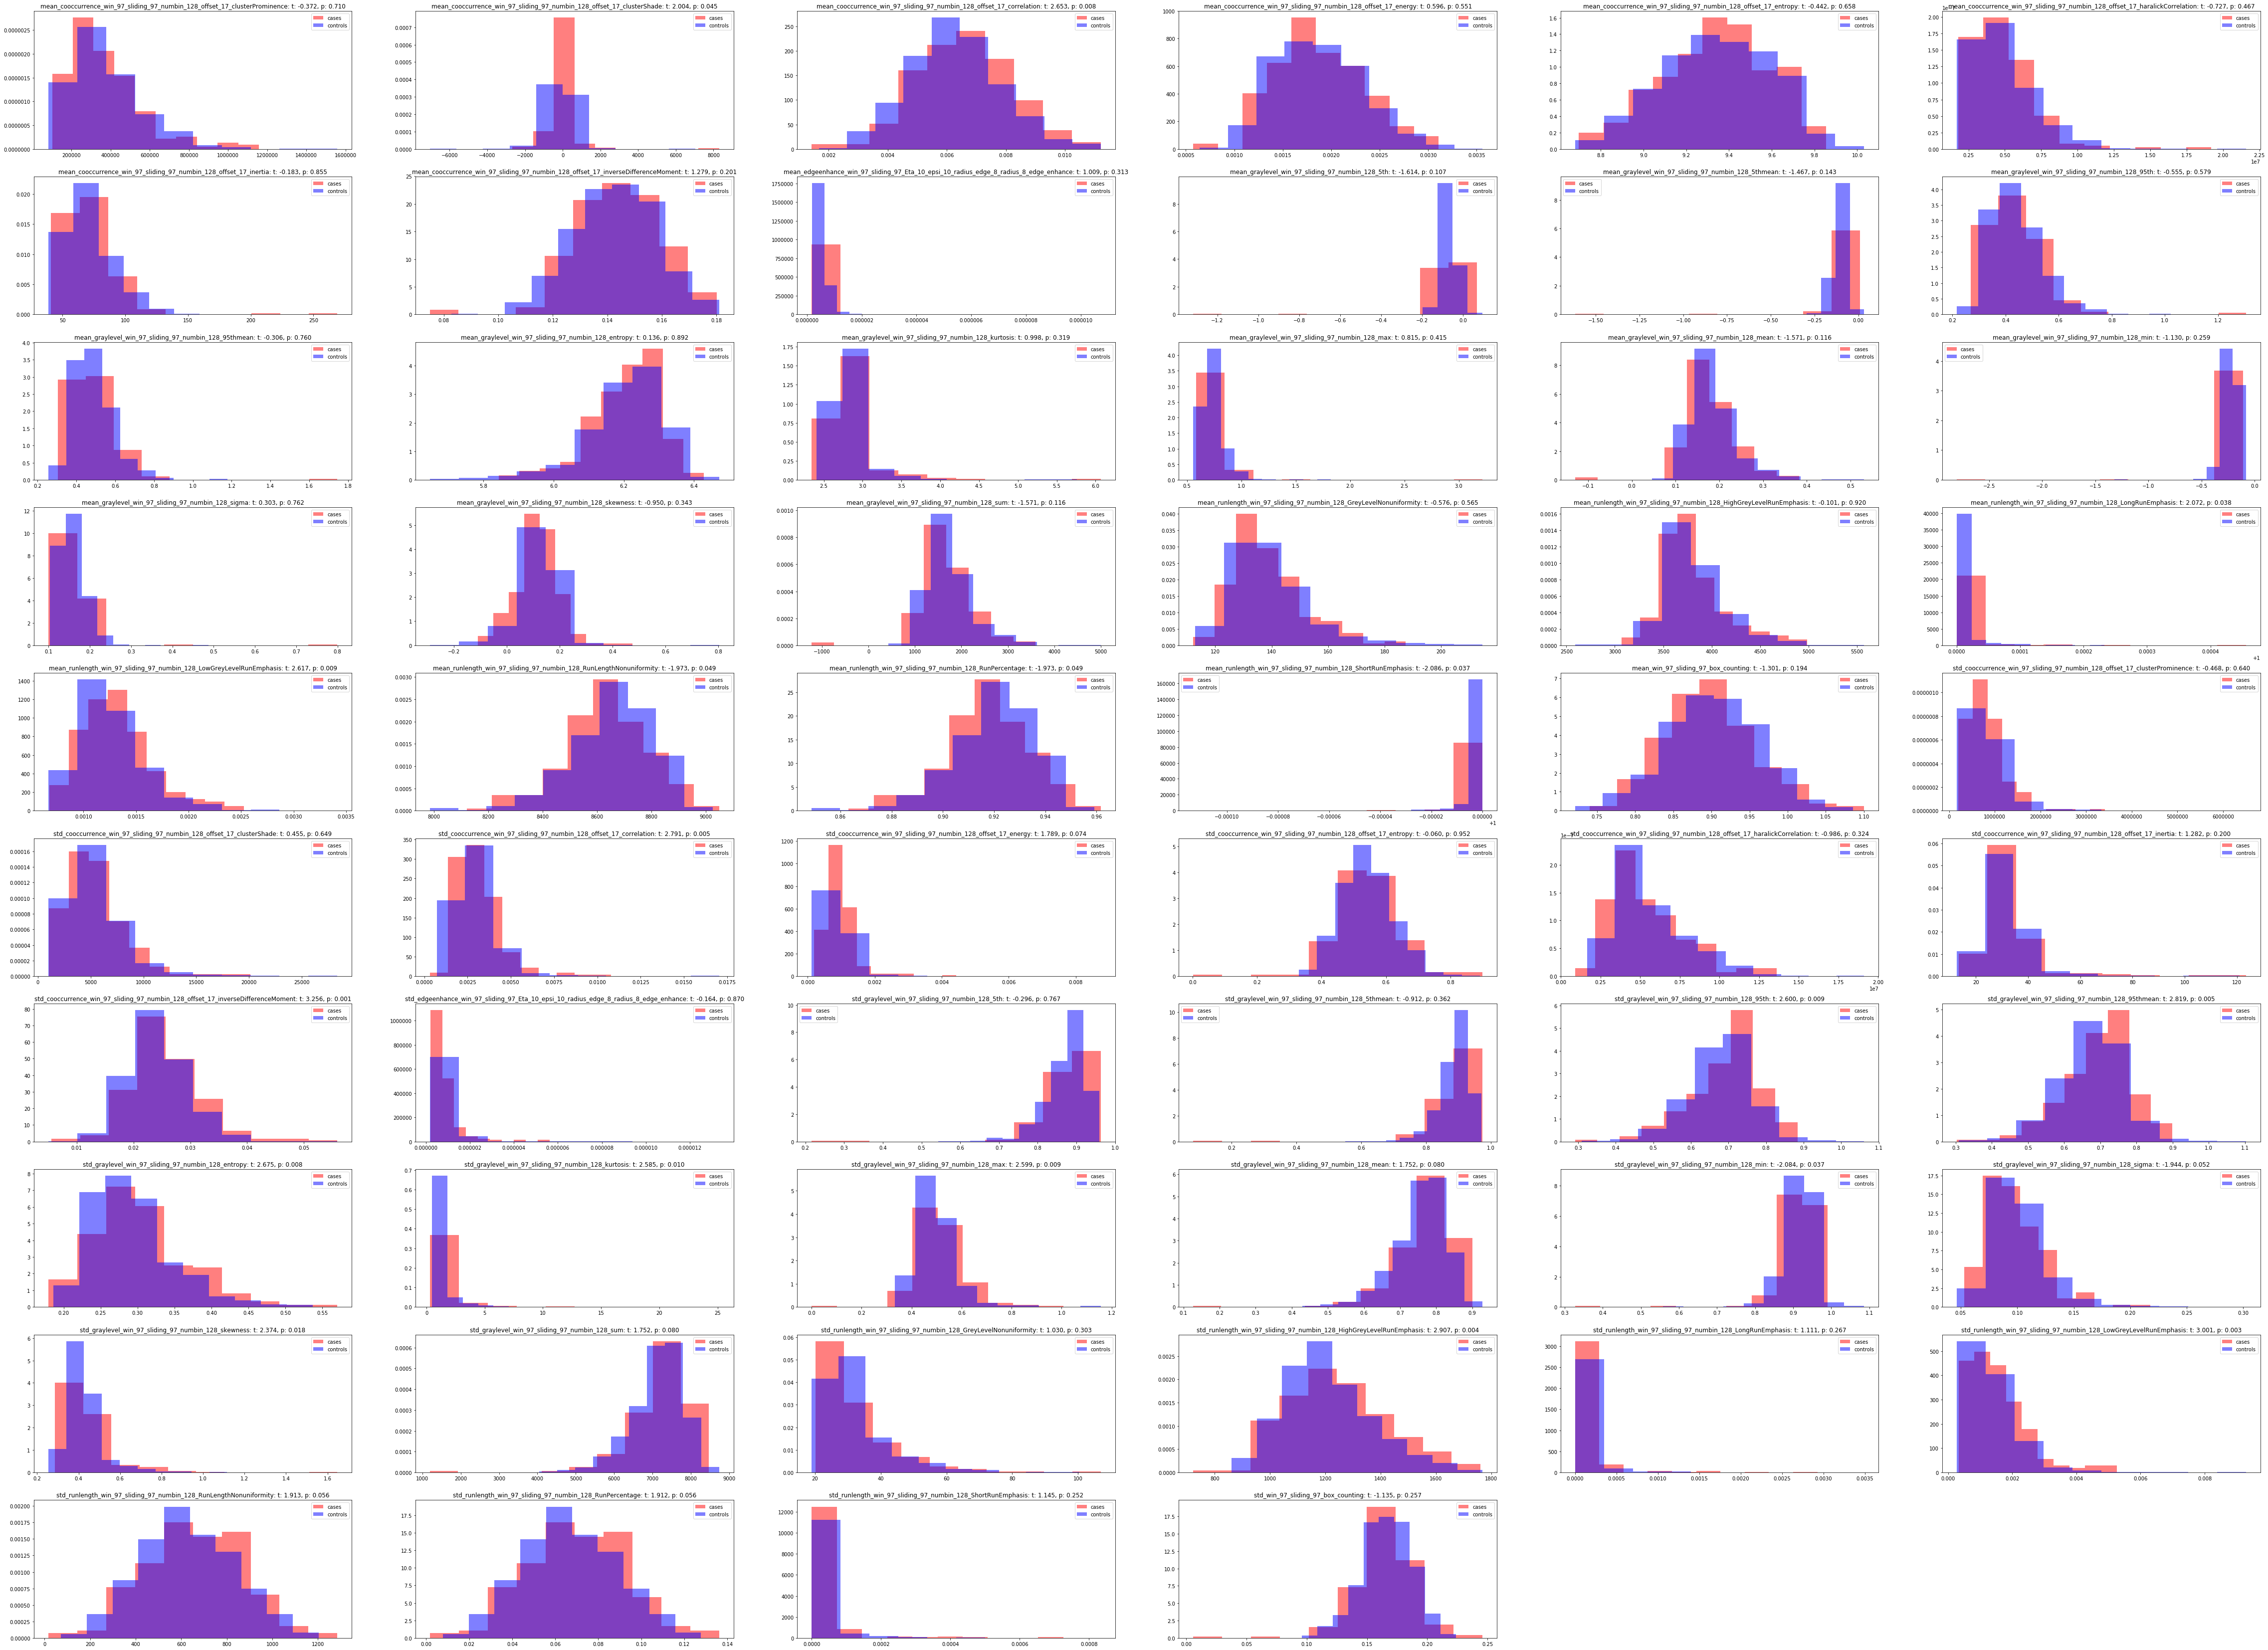

In [8]:
rows = list()

plt.figure(figsize=(80, 60))
for i, name in enumerate(feature_names):
    plt.subplot(10, 6, i+1)
    cases = merged_df.query('Class == 1')[name]
    non_cases = merged_df.query('Class != 1')[name]
    t, p = ttest_ind(cases, non_cases)
    rows.append([name, t, p])
    plt.hist(cases, color='r', alpha=0.5, density=True, label='cases')
    plt.hist(non_cases, color='b', alpha=0.5, density=True, label='controls')
    plt.legend()
    plt.title(f'{name}: t: {t :.3f}, p: {p :.3f}')
plt.savefig('data/summary_stat_dists.png', bbox_inches="tight", pad_inches=0)

In [10]:
signif_df = pd.DataFrame(rows, columns=['feature_stat', 't_stat', 'p_value'])
signif_df.to_csv('data/summary_stat_significance.tsv', sep='\t', index=False)

In [15]:
signif_df.sort_values('p_value', ascending=True)

,feature_stat,t_stat,p_value
36,std_cooccurrence_win_97_sliding_97_numbin_128_...,3.256264,0.001164
53,std_runlength_win_97_sliding_97_numbin_128_Low...,3.000538,0.002756
51,std_runlength_win_97_sliding_97_numbin_128_Hig...,2.907101,0.003722
41,std_graylevel_win_97_sliding_97_numbin_128_95t...,2.819231,0.004901
31,std_cooccurrence_win_97_sliding_97_numbin_128_...,2.791028,0.005346
42,std_graylevel_win_97_sliding_97_numbin_128_ent...,2.674977,0.007585
2,mean_cooccurrence_win_97_sliding_97_numbin_128...,2.652931,0.008096
24,mean_runlength_win_97_sliding_97_numbin_128_Lo...,2.617086,0.008991
40,std_graylevel_win_97_sliding_97_numbin_128_95th,2.600413,0.009437
44,std_graylevel_win_97_sliding_97_numbin_128_max,2.599428,0.009464
